# Linear regression using scikit-learn
This notebook implements a simple linear regression using the library scikit-learn and the Boston dataset included in this library. This dataset contains data about the housing and price information in the Boston area in 70s. The dataset is maintained by Carnegie Mellon University.

## 1 - Preparing the dataset
In this section we will load and prepare the dataset to be used in subsequent steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston

dataset = load_boston()

c:\users\lorenzo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

Printing the dataset

In [2]:
print(dataset.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


Printing the features names

In [3]:
print(dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Printing the information regarding the Boston dataset

In [4]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Printing the target values (price of the houses)

In [5]:
print(dataset.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

Simple plot showing the values of the target (dependent variable)

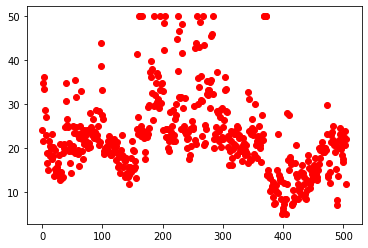

In [6]:
plt.plot(dataset.target, 'ro')

We will use a DataFrame (Pandas library) to load and manipulate the data. The DataFrame is represented as follows:

In [7]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We need to include also the target values, in that case, in a new column named "LABELS"

In [8]:
df['OUTPUT'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,OUTPUT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We can print the information regarding this dataframe. As we can see, there are 506 entries (sample instances) and all of them are numeric. Therefore, we do not need to perform any transformation. Notice that sklearn only works with numeric values and string values must be encoded.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  OUTPUT   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


We can also check if there are missing values in the dataset as follows (which is not the case, as shown above and below):

In [10]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
OUTPUT     0
dtype: int64


## 2 - Feature selection
In this section we will performed a very basic feature selection process to simplify the visual representation of the linear regression. To that end, we will check the correlation between independent variables (housing characteristics) and the dependent variable (house price)

In [11]:
corr = df.corr()
print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

To facilitate the work, we can print only the relevant column/row

In [12]:
print(corr['OUTPUT'])

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
OUTPUT     1.000000
Name: OUTPUT, dtype: float64


A higher (absolute) value represents a stronger influence on the dependent variable and consequently, it should lead to a better performance of the linear regression. Therefore, we will filter the results to visualize only the two most relevant independent variables. Notice that the one with higher correlation (corr = 1) belongs to the 'LABELS' column itself.

In [13]:
print(df.corr().abs().nlargest(3, 'OUTPUT').index)
print(df.corr().abs().nlargest(3, 'OUTPUT').values[:, 13])

Index(['OUTPUT', 'LSTAT', 'RM'], dtype='object')
[1.         0.73766273 0.69535995]


Let's print the relationship between LSTAT and LABELS

Text(0, 0.5, 'OUTPUT')

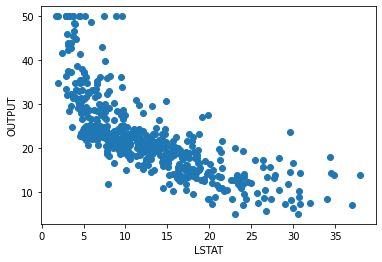

In [14]:
plt.scatter(df['LSTAT'], df['OUTPUT'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('OUTPUT')

From the previous figure we can deduce that there are a strong linear correlation between then so a linear regression model trained with this feature should lead to decend results

## 3 - Training the Linear Regression model with one variable
Firstly, we will create two new DataFrames to store exclusively the features under study, LSTAT

In [15]:
x = pd.DataFrame(df['LSTAT'])
Y = df['OUTPUT']

print(x.shape)
print(Y.shape)

(506, 1)
(506,)


Then, we need to split the new dataset into 70% for training and 30% for testing.
Note: for more information regarding the "random_state" parameter, visit https://scikit-learn.org/stable/glossary.html#term-random-state

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3,
                                                    random_state=5)

print(x_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(Y_test.shape)

(354, 1)
(354,)
(152, 1)
(152,)


Using the x_train and Y_train DataFrames, a Linear Regression model will be trained

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)

print(model.coef_)
print(model.intercept_)

[-0.93779699]
34.2923731287397


Using the intercept and coefficient values we can represent the Linear model as:

$y = h_\theta(x) = \theta_0 + \theta_1x$

$h_\theta(x) = 34.2923 - 0.9378x$

Now, we will check the error when predicting the values from the test set

In [18]:
price_pred = model.predict(x_test)
print('R-squared: %.4f' % model.score(x_test,
                                      Y_test))

R-squared: 0.5170


If we print the model together with the test data, we can see that the model is quite accurate

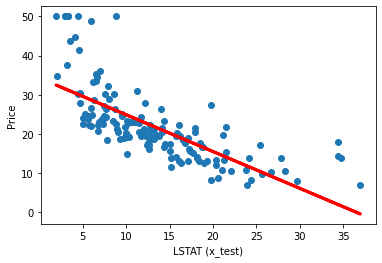

In [19]:
plt.scatter(x_test, Y_test)
plt.plot(x_test, price_pred, color='red', linewidth=3)
plt.xlabel('LSTAT (x_test)')
plt.ylabel('Price')
plt.show()

## 3 - Training the Linear Regression model with two variables
We can also train a Linear Regression model using two features (LSTAT and RM). In that case, the visual representation of the model is plane (3 dimensional space), instead of a line (2D)

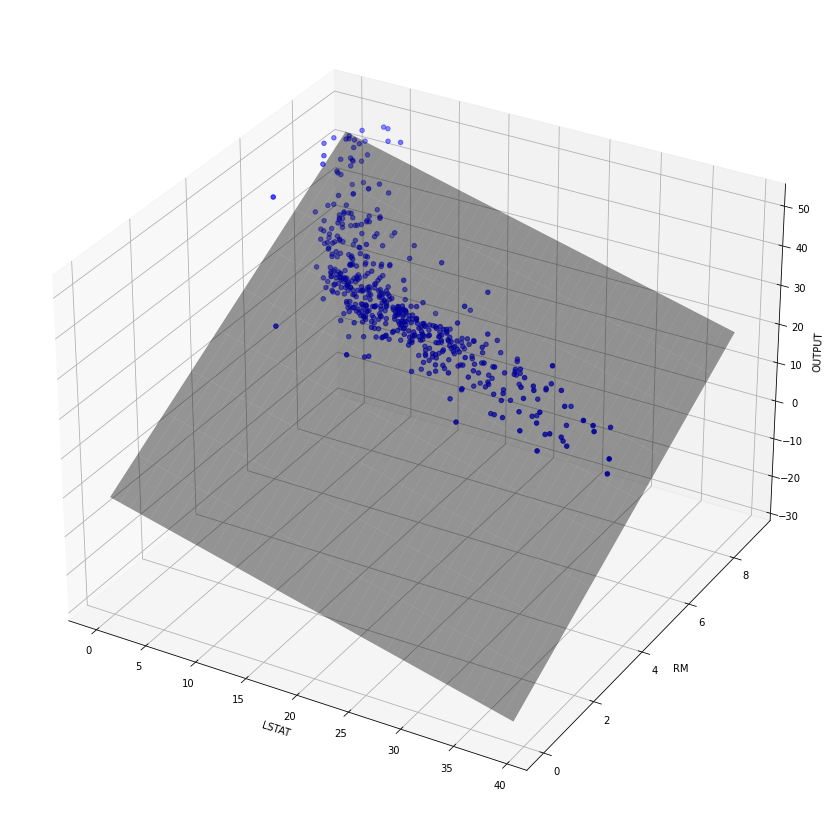

In [20]:
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['OUTPUT']
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['LSTAT'],
 x['RM'],
 Y,
 c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("OUTPUT")

# Create a meshgrid of all the values for LSTAT and RM
x_surf = np.arange(0, 40, 1) # for LSTAT
y_surf = np.arange(0, 10, 1) # for RM
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

model = LinearRegression()
model.fit(x, Y)

# Calculate z (LABELS) based on the model
z = lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)

ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
 rstride=1,
 cstride=1,
 color='None',
 alpha = 0.4)
plt.show()

When using 2 independent variables (Multivariate linear regression), we will have a hypothesis as follows:

$y = h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2$

In [21]:
print(model.intercept_)
print(model.coef_)

-1.358272811874496
[-0.64235833  5.09478798]


$h_\theta(x) = -1.36 - 0.64x_1 + 5.09x_2$